<a href="https://colab.research.google.com/github/Bebin11/AI_Coursework/blob/main/Regression_Task_Zomato.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression Task — Zomato Bangalore Restaurants
**Dataset:** Zomato Bangalore Restaurants (Kaggle)

**SDG:** SDG 8 – Decent Work and Economic Growth

**Target Variable:** `rate` (restaurant rating)

**Models:** MLP Regressor, Linear Regression, Random Forest Regressor

**Environment:** Google Colab

## Cell 1: Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print('All libraries imported successfully!')

All libraries imported successfully!


## Cell 2: Load the Dataset
The dataset file (`zomato.csv`) should already be uploaded to Colab.
If not, upload it using the file browser or `files.upload()`.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# If the file is not already uploaded, uncomment the next two lines:
# from google.colab import files
# uploaded = files.upload()

df = pd.read_csv('/content/drive/MyDrive/zomato.csv')
print(f'Dataset loaded successfully!')
print(f'Shape: {df.shape}')
df.head()

Dataset loaded successfully!
Shape: (51717, 17)


,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


## Cell 3: Dataset Understanding
**Source & Purpose:** The Zomato Bangalore Restaurants dataset from Kaggle contains information about restaurants in Bangalore listed on Zomato. It is used for analyzing restaurant performance based on features like cost, location, cuisine, and services offered.

**SDG 8 Relevance:** Restaurants are a major part of Bangalore's urban economy. Understanding what drives restaurant ratings helps support small business owners in making data-driven decisions, contributing to decent work and economic growth.

**Input Features:** Cost for two, location, restaurant type, online ordering, table booking, cuisines, votes, etc.

**Target Variable:** `rate` — the restaurant rating (numeric, continuous after cleaning).


In [ ]:
# List all features
print('Column Names:')
print(list(df.columns))
print(f'\nNumber of features: {df.shape[1]}')
print(f'Number of records: {df.shape[0]}')

# Data types
print('\nData Types:')
print(df.dtypes)

# Identify input features and target
print('\n--- Feature Roles ---')
print('Target variable: rate')
print('Input features: url, address, name, online_order, book_table, votes,')
print('                location, rest_type, dish_liked, cuisines, approx_cost(for two people),')
print('                reviews_list, menu_item, listed_in(type), listed_in(city), etc.')

Column Names:
['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes', 'phone', 'location', 'rest_type', 'dish_liked', 'cuisines', 'approx_cost(for two people)', 'reviews_list', 'menu_item', 'listed_in(type)', 'listed_in(city)']

Number of features: 17
Number of records: 51717

Data Types:
url                            object
address                        object
name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
phone                          object
location                       object
rest_type                      object
dish_liked                     object
cuisines                       object
approx_cost(for two people)    object
reviews_list                   object
menu_item                      object
listed_in(type)                object
listed_in(city)                object
dtype: object

--- Feature Roles ---
Target va

## Cell 4: Assess Missing Values, Outliers, and Consistency

In [ ]:
# Missing values
print('=' * 60)
print('MISSING VALUES')
print('=' * 60)
missing = df.isnull().sum()
missing_pct = (df.isnull().sum() / len(df)) * 100
missing_df = pd.DataFrame({'Missing Count': missing, 'Percentage (%)': round(missing_pct, 2)})
print(missing_df[missing_df['Missing Count'] > 0].sort_values('Missing Count', ascending=False))

# Check the target column 'rate'
print('\n' + '=' * 60)
print('TARGET COLUMN (rate) INSPECTION')
print('=' * 60)
print(f'Unique values sample: {df["rate"].unique()[:20]}')
print(f'Total unique: {df["rate"].nunique()}')
print(f'Missing: {df["rate"].isnull().sum()}')

# Check for invalid entries in rate
print('\nValue counts for non-numeric rate entries:')
# Identify entries that cannot be converted to float
def is_valid_rate(val):
    try:
        float(str(val).split('/')[0])
        return True
    except:
        return False

invalid_mask = ~df['rate'].apply(is_valid_rate)
print(df.loc[invalid_mask, 'rate'].value_counts())

# Check approx_cost column
print('\n--- approx_cost(for two people) sample ---')
print(df['approx_cost(for two people)'].unique()[:15])

# Consistency note
print('\n--- Suitability Assessment ---')
print('- Target "rate" contains entries like "NEW", "-", and "x/5" format that need cleaning.')
print('- approx_cost has commas that need removal.')
print('- Several categorical columns with high cardinality (cuisines, location, rest_type).')
print('- After cleaning, the dataset is suitable for regression.')

MISSING VALUES
                             Missing Count  Percentage (%)
dish_liked                           28078           54.29
rate                                  7775           15.03
phone                                 1208            2.34
approx_cost(for two people)            346            0.67
rest_type                              227            0.44
cuisines                                45            0.09
location                                21            0.04

TARGET COLUMN (rate) INSPECTION
Unique values sample: ['4.1/5' '3.8/5' '3.7/5' '3.6/5' '4.6/5' '4.0/5' '4.2/5' '3.9/5' '3.1/5'
 '3.0/5' '3.2/5' '3.3/5' '2.8/5' '4.4/5' '4.3/5' 'NEW' '2.9/5' '3.5/5' nan
 '2.6/5']
Total unique: 64
Missing: 7775

Value counts for non-numeric rate entries:
rate
NEW    2208
-        69
Name: count, dtype: int64

--- approx_cost(for two people) sample ---
['800' '300' '600' '700' '550' '500' '450' '650' '400' '900' '200' '750'
 '150' '850' '100']

--- Suitability Assessment ---
-

## Cell 5: EDA — Basic Inspection

In [ ]:
print('--- First 5 Rows ---')
df.head()

--- First 5 Rows ---


,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [ ]:
print('--- Dataset Info ---')
df.info()

--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_li

In [ ]:
print('--- Descriptive Statistics ---')
df.describe(include='all')

--- Descriptive Statistics ---


,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
count,51717,51717,51717,51717,51717,43942,51717.000000,50509,51696,51490,23639,51672,51371,51717,51717,51717,51717
unique,51717,11495,8792,2,2,64,NaN,14926,93,93,5271,2723,70,22513,9098,7,30
top,https://www.zomato.com/bangalore/the-nest-the-...,Delivery Only,Cafe Coffee Day,Yes,No,NEW,NaN,080 43334321,BTM,Quick Bites,Biryani,North Indian,300,[],[],Delivery,BTM
freq,1,128,96,30444,45268,2208,NaN,216,5124,19132,182,2913,7576,7595,39617,25942,3279
mean,NaN,NaN,NaN,NaN,NaN,NaN,283.697527,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,803.838853,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,7.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,41.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,198.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Cell 6: Data Cleaning — Handle Missing Values and Invalid Ratings

In [ ]:
# --- Step 1: Clean the target column 'rate' ---
# Remove rows with 'NEW', '-', or NaN in rate
print(f'Shape before cleaning rate: {df.shape}')

# Drop rows where rate is NaN
df = df.dropna(subset=['rate'])

# Remove invalid entries like 'NEW' and '-'
df = df[~df['rate'].isin(['NEW', '-'])]

# Extract numeric rating from 'x/5' format
df['rate'] = df['rate'].apply(lambda x: float(str(x).split('/')[0].strip()))
print(f'Shape after cleaning rate: {df.shape}')
print(f'Rate range: {df["rate"].min()} to {df["rate"].max()}')
print(f'Rate mean: {df["rate"].mean():.2f}')

# --- Step 2: Clean approx_cost(for two people) ---
df['approx_cost(for two people)'] = (
    df['approx_cost(for two people)']
    .astype(str)
    .str.replace(',', '', regex=False)
)
df['approx_cost(for two people)'] = pd.to_numeric(
    df['approx_cost(for two people)'], errors='coerce'
)

# --- Step 3: Encode binary columns ---
df['online_order'] = df['online_order'].map({'Yes': 1, 'No': 0})
df['book_table'] = df['book_table'].map({'Yes': 1, 'No': 0})

# --- Step 4: Drop columns not useful for regression ---
# url, address, name, phone, reviews_list, menu_item, dish_liked are free text / IDs
cols_to_drop = ['url', 'address', 'name', 'phone', 'reviews_list',
                'menu_item', 'dish_liked']
cols_to_drop = [c for c in cols_to_drop if c in df.columns]
df = df.drop(columns=cols_to_drop)
print(f'\nShape after dropping text/ID columns: {df.shape}')
print(f'Remaining columns: {list(df.columns)}')

# --- Step 5: Handle missing values in remaining columns ---
# Numerical: fill with median
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
num_cols = [c for c in num_cols if c != 'rate']
for col in num_cols:
    if df[col].isnull().sum() > 0:
        median_val = df[col].median()
        df[col] = df[col].fillna(median_val)
        print(f"Filled '{col}' missing with median: {median_val}")

# Categorical: fill with mode
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
for col in cat_cols:
    if df[col].isnull().sum() > 0:
        mode_val = df[col].mode()[0]
        df[col] = df[col].fillna(mode_val)
        print(f"Filled '{col}' missing with mode: {mode_val}")

print(f'\nRemaining missing values: {df.isnull().sum().sum()}')
print(f'Final cleaned shape: {df.shape}')

Shape before cleaning rate: (51717, 17)
Shape after cleaning rate: (41665, 17)
Rate range: 1.8 to 4.9
Rate mean: 3.70

Shape after dropping text/ID columns: (41665, 10)
Remaining columns: ['online_order', 'book_table', 'rate', 'votes', 'location', 'rest_type', 'cuisines', 'approx_cost(for two people)', 'listed_in(type)', 'listed_in(city)']
Filled 'approx_cost(for two people)' missing with median: 500.0
Filled 'rest_type' missing with mode: Quick Bites
Filled 'cuisines' missing with mode: North Indian

Remaining missing values: 0
Final cleaned shape: (41665, 10)


## Cell 7: EDA — Histogram of Target Variable (`rate`)

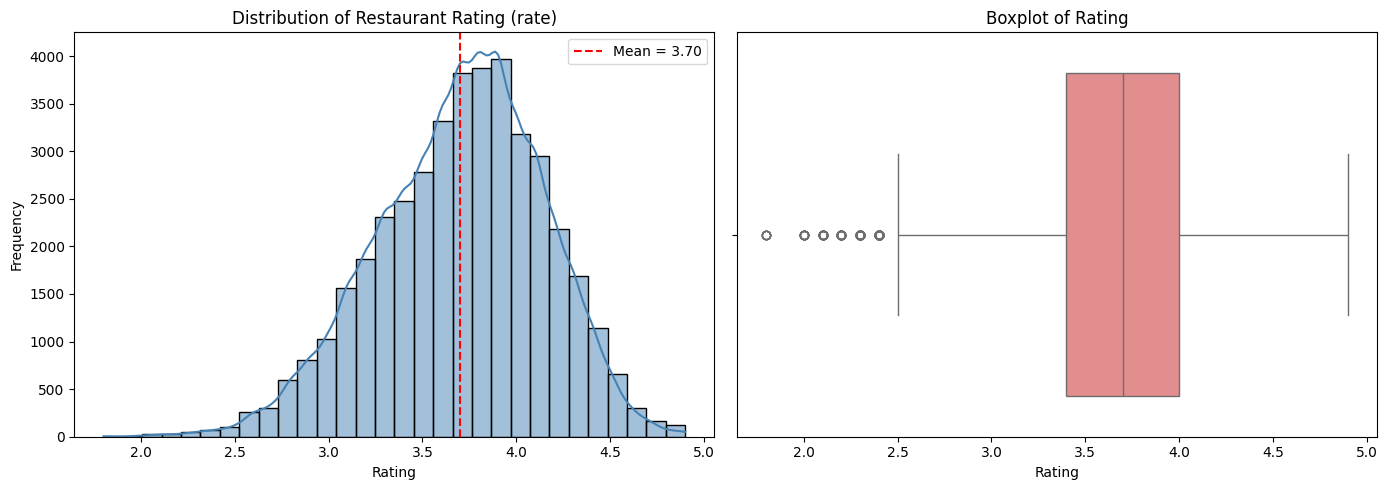

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
sns.histplot(df['rate'], bins=30, kde=True, ax=axes[0], color='steelblue')
axes[0].set_title('Distribution of Restaurant Rating (rate)')
axes[0].set_xlabel('Rating')
axes[0].set_ylabel('Frequency')
axes[0].axvline(df['rate'].mean(), color='red', linestyle='--', label=f"Mean = {df['rate'].mean():.2f}")
axes[0].legend()

# Boxplot
sns.boxplot(x=df['rate'], ax=axes[1], color='lightcoral')
axes[1].set_title('Boxplot of Rating')
axes[1].set_xlabel('Rating')

plt.tight_layout()
plt.show()

## Cell 8: EDA — Boxplots for Numerical Features

Numerical features for boxplots: ['online_order', 'book_table', 'votes', 'approx_cost(for two people)']


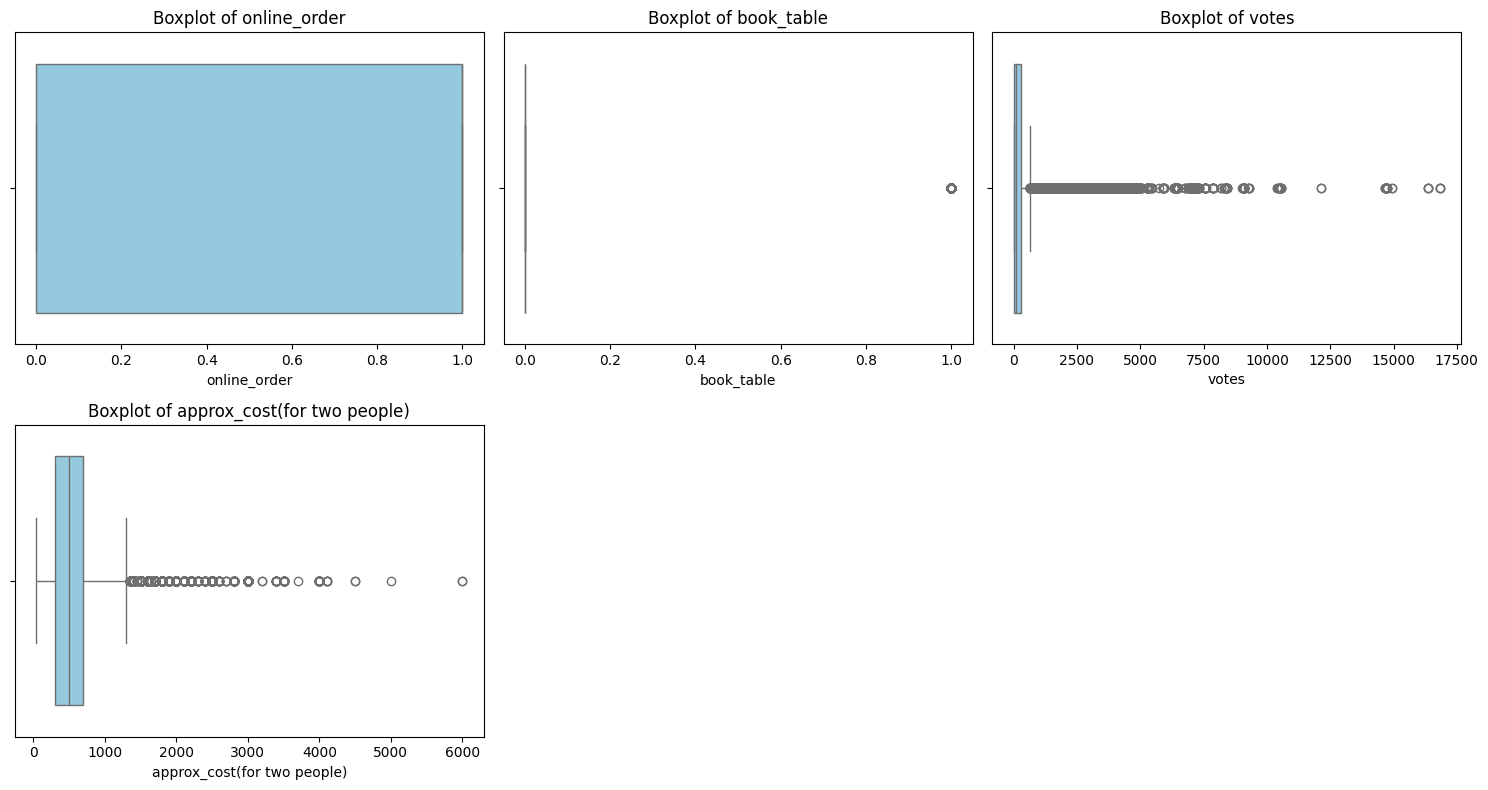

In [ ]:
numerical_features = df.select_dtypes(include=[np.number]).columns.tolist()
plot_features = [c for c in numerical_features if c != 'rate']

print(f'Numerical features for boxplots: {plot_features}')

n_cols_plot = 3
n_rows_plot = max(1, (len(plot_features) + n_cols_plot - 1) // n_cols_plot)

fig, axes = plt.subplots(n_rows_plot, n_cols_plot, figsize=(5 * n_cols_plot, 4 * n_rows_plot))
if n_rows_plot == 1 and n_cols_plot == 1:
    axes = [axes]
else:
    axes = axes.flatten()

for i, col in enumerate(plot_features):
    sns.boxplot(x=df[col], ax=axes[i], color='skyblue')
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].set_xlabel(col)

for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

## Cell 9: EDA — Correlation Heatmap

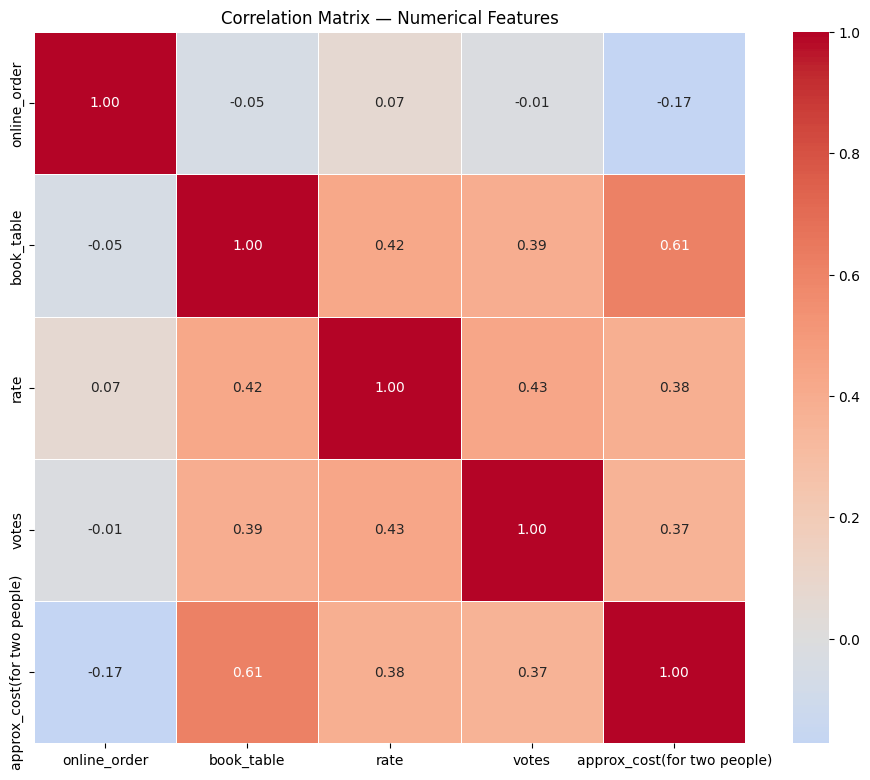

In [ ]:
corr_cols = df.select_dtypes(include=[np.number]).columns.tolist()
corr_matrix = df[corr_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm',
            center=0, square=True, linewidths=0.5)
plt.title('Correlation Matrix — Numerical Features')
plt.tight_layout()
plt.show()

## Cell 10: EDA — Scatter Plots (Features vs Rate)

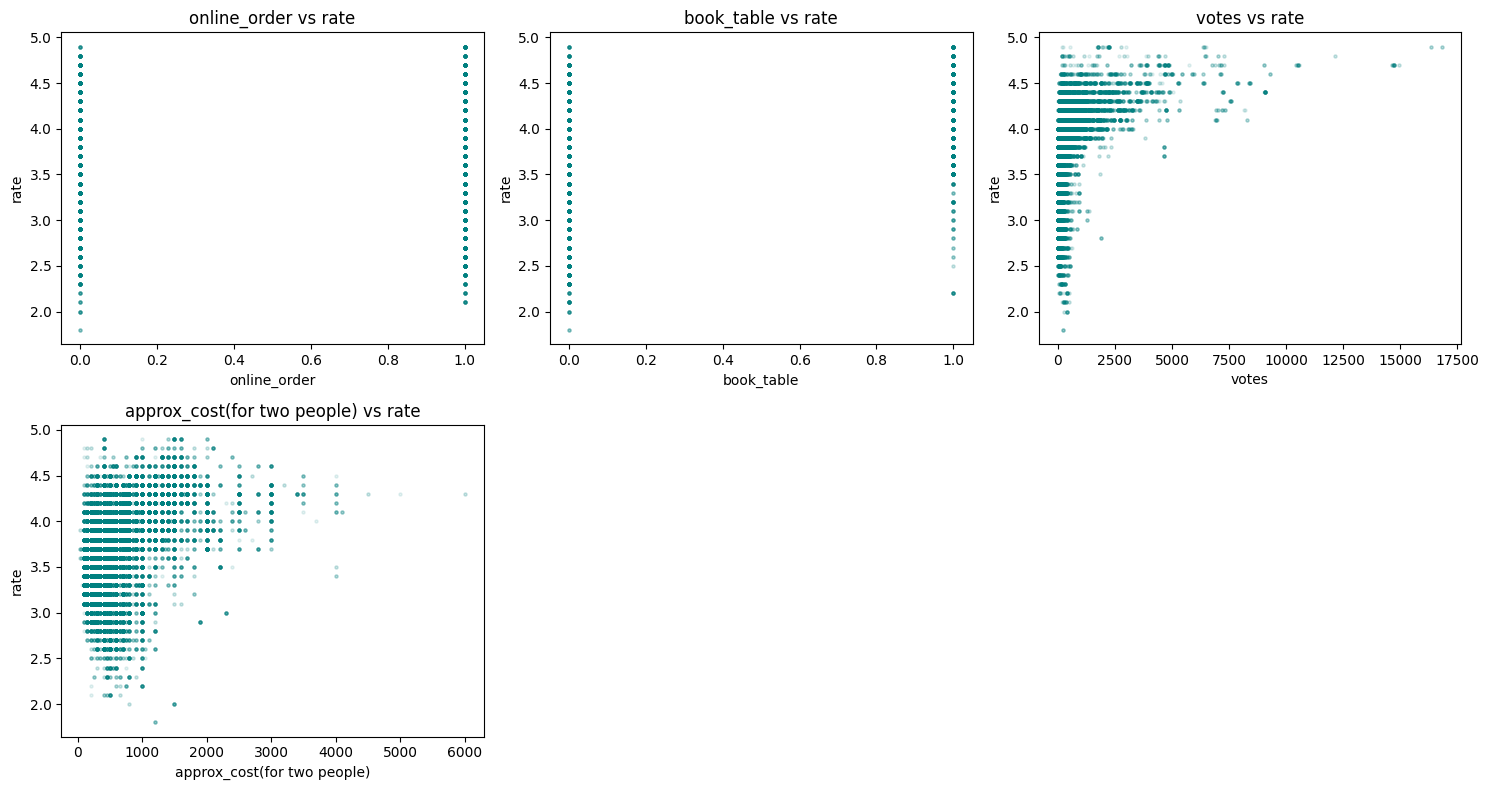

--- Modeling Implications ---
- votes and approx_cost show some correlation with rate.
- online_order and book_table are binary and may have modest predictive power.
- High cardinality categorical features will need encoding.
- Outliers in cost and votes may affect linear models; tree models are more robust.


In [ ]:
scatter_features = [c for c in df.select_dtypes(include=[np.number]).columns if c != 'rate']

n_cols_plot = 3
n_rows_plot = max(1, (len(scatter_features) + n_cols_plot - 1) // n_cols_plot)

fig, axes = plt.subplots(n_rows_plot, n_cols_plot, figsize=(5 * n_cols_plot, 4 * n_rows_plot))
if n_rows_plot == 1 and n_cols_plot == 1:
    axes = [axes]
else:
    axes = axes.flatten()

for i, col in enumerate(scatter_features):
    axes[i].scatter(df[col], df['rate'], alpha=0.1, s=5, color='teal')
    axes[i].set_title(f'{col} vs rate')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('rate')

for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

# Brief note on modeling implications
print('--- Modeling Implications ---')
print('- votes and approx_cost show some correlation with rate.')
print('- online_order and book_table are binary and may have modest predictive power.')
print('- High cardinality categorical features will need encoding.')
print('- Outliers in cost and votes may affect linear models; tree models are more robust.')

## Cell 11: Preprocessing — Encode, Scale, and Split

In [ ]:
# Label encode remaining categorical columns
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
print(f'Categorical columns to encode: {cat_cols}')

label_encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le
    print(f"  Encoded '{col}': {len(le.classes_)} classes")

# Separate features and target
X = df.drop(columns=['rate'])
y = df['rate']

feature_names = X.columns.tolist()
print(f'\nTotal features: {len(feature_names)}')
print(f'Features: {feature_names}')

# Scale features
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=feature_names, index=X.index)

# 80/20 Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

print(f'\nTraining set: {X_train.shape}')
print(f'Test set: {X_test.shape}')
print(f'\ny_train — Mean: {y_train.mean():.3f}, Std: {y_train.std():.3f}')
print(f'y_test  — Mean: {y_test.mean():.3f}, Std: {y_test.std():.3f}')

Categorical columns to encode: ['location', 'rest_type', 'cuisines', 'listed_in(type)', 'listed_in(city)']
  Encoded 'location': 92 classes
  Encoded 'rest_type': 87 classes
  Encoded 'cuisines': 2383 classes
  Encoded 'listed_in(type)': 7 classes
  Encoded 'listed_in(city)': 30 classes

Total features: 9
Features: ['online_order', 'book_table', 'votes', 'location', 'rest_type', 'cuisines', 'approx_cost(for two people)', 'listed_in(type)', 'listed_in(city)']

Training set: (33332, 9)
Test set: (8333, 9)

y_train — Mean: 3.702, Std: 0.441
y_test  — Mean: 3.695, Std: 0.440


## Cell 12: Evaluation Helper Function
Computes MSE, RMSE, MAE, and R² for both train and test sets.

In [ ]:
def evaluate_regression(model_name, y_train_true, y_train_pred,
                        y_test_true, y_test_pred):
    """
    Evaluate regression model on train and test sets.
    Returns dict with all metrics.
    """
    results = {}

    for split_name, yt, yp in [('Train', y_train_true, y_train_pred),
                                ('Test', y_test_true, y_test_pred)]:
        mse = mean_squared_error(yt, yp)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(yt, yp)
        r2 = r2_score(yt, yp)

        results[f'{split_name}_MSE'] = round(mse, 4)
        results[f'{split_name}_RMSE'] = round(rmse, 4)
        results[f'{split_name}_MAE'] = round(mae, 4)
        results[f'{split_name}_R2'] = round(r2, 4)

        print(f'  {split_name} — MSE: {mse:.4f} | RMSE: {rmse:.4f} | MAE: {mae:.4f} | R²: {r2:.4f}')

    results['Model'] = model_name
    return results

print('Evaluation helper defined.')

Evaluation helper defined.


## Cell 13: Model 1 — MLP Regressor

In [ ]:
print('=' * 60)
print('MODEL 1: MLP REGRESSOR (Neural Network)')
print('=' * 60)

# Define architecture explicitly
# Architecture: Input -> 128 -> 64 -> 32 -> Output
# Activation: ReLU
# Loss: Squared error (default for MLPRegressor)
# Optimizer: Adam
mlp_reg = MLPRegressor(
    hidden_layer_sizes=(128, 64, 32),   # 3 hidden layers
    activation='relu',                   # Activation function
    solver='adam',                        # Optimizer
    max_iter=500,
    random_state=42,
    early_stopping=True,
    validation_fraction=0.1,
    learning_rate='adaptive',
    learning_rate_init=0.001
)

print('Architecture: Input -> 128 -> 64 -> 32 -> Output(1)')
print('Activation: ReLU')
print('Loss: Squared Error (default)')
print('Optimizer: Adam')
print('Learning Rate: 0.001 (adaptive)')
print('Early Stopping: True')

# Train
mlp_reg.fit(X_train, y_train)
print(f'\nTraining completed in {mlp_reg.n_iter_} iterations.')

# Predictions
y_train_pred_mlp = mlp_reg.predict(X_train)
y_test_pred_mlp = mlp_reg.predict(X_test)

# Cross-validation score
cv_scores_mlp = cross_val_score(mlp_reg, X_train, y_train, cv=5,
                                 scoring='neg_mean_squared_error')
cv_rmse_mlp = np.sqrt(-cv_scores_mlp.mean())
print(f'CV RMSE (5-fold): {cv_rmse_mlp:.4f}')

# Evaluate
print('\n--- Metrics ---')
metrics_mlp = evaluate_regression('MLP Regressor', y_train, y_train_pred_mlp,
                                   y_test, y_test_pred_mlp)
metrics_mlp['CV_RMSE'] = round(cv_rmse_mlp, 4)
metrics_mlp['Num_Features'] = X_train.shape[1]

MODEL 1: MLP REGRESSOR (Neural Network)
Architecture: Input -> 128 -> 64 -> 32 -> Output(1)
Activation: ReLU
Loss: Squared Error (default)
Optimizer: Adam
Learning Rate: 0.001 (adaptive)
Early Stopping: True

Training completed in 40 iterations.
CV RMSE (5-fold): 0.3096

--- Metrics ---
  Train — MSE: 0.0961 | RMSE: 0.3099 | MAE: 0.2280 | R²: 0.5054
  Test — MSE: 0.0997 | RMSE: 0.3158 | MAE: 0.2333 | R²: 0.4846


## Cell 14: Model 2 — Linear Regression

In [ ]:
print('=' * 60)
print('MODEL 2: LINEAR REGRESSION')
print('=' * 60)

# --- Step 1: Train baseline model ---
print('\n--- Step 1: Baseline Model ---')
lr_baseline = LinearRegression()
lr_baseline.fit(X_train, y_train)
y_test_baseline = lr_baseline.predict(X_test)
print(f'  Baseline Test R²: {r2_score(y_test, y_test_baseline):.4f}')
print(f'  Baseline Test RMSE: {np.sqrt(mean_squared_error(y_test, y_test_baseline)):.4f}')

# --- Step 2: Hyperparameter tuning with Ridge (regularized linear regression) ---
# Using Ridge since vanilla LinearRegression has no hyperparameters to tune
print('\n--- Step 2: Hyperparameter Tuning (Ridge with GridSearchCV) ---')
param_grid_ridge = {
    'alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
}

grid_ridge = GridSearchCV(
    Ridge(random_state=42),
    param_grid_ridge,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)
grid_ridge.fit(X_train, y_train)
print(f'  Best alpha: {grid_ridge.best_params_}')
cv_rmse_lr = np.sqrt(-grid_ridge.best_score_)
print(f'  Best CV RMSE: {cv_rmse_lr:.4f}')

# --- Step 3: Feature selection using RFE ---
print('\n--- Step 3: Feature Selection (RFE) ---')
best_ridge = grid_ridge.best_estimator_
n_features_select = min(10, X_train.shape[1])
rfe_lr = RFE(estimator=Ridge(alpha=grid_ridge.best_params_['alpha']),
             n_features_to_select=n_features_select, step=1)
rfe_lr.fit(X_train, y_train)

selected_features_lr = [f for f, s in zip(feature_names, rfe_lr.support_) if s]
print(f'  Selected {len(selected_features_lr)} features: {selected_features_lr}')

# --- Step 4: Retrain final model with selected features ---
print('\n--- Step 4: Retrain Final Model ---')
X_train_lr = X_train[selected_features_lr]
X_test_lr = X_test[selected_features_lr]

lr_final = Ridge(alpha=grid_ridge.best_params_['alpha'], random_state=42)
lr_final.fit(X_train_lr, y_train)

# Predictions
y_train_pred_lr = lr_final.predict(X_train_lr)
y_test_pred_lr = lr_final.predict(X_test_lr)

# Evaluate
print('\n--- Metrics ---')
metrics_lr = evaluate_regression('Linear Regression (Ridge)', y_train, y_train_pred_lr,
                                  y_test, y_test_pred_lr)
metrics_lr['CV_RMSE'] = round(cv_rmse_lr, 4)
metrics_lr['Num_Features'] = len(selected_features_lr)

MODEL 2: LINEAR REGRESSION

--- Step 1: Baseline Model ---
  Baseline Test R²: 0.2929
  Baseline Test RMSE: 0.3699

--- Step 2: Hyperparameter Tuning (Ridge with GridSearchCV) ---
  Best alpha: {'alpha': 100.0}
  Best CV RMSE: 0.3689

--- Step 3: Feature Selection (RFE) ---
  Selected 9 features: ['online_order', 'book_table', 'votes', 'location', 'rest_type', 'cuisines', 'approx_cost(for two people)', 'listed_in(type)', 'listed_in(city)']

--- Step 4: Retrain Final Model ---

--- Metrics ---
  Train — MSE: 0.1360 | RMSE: 0.3687 | MAE: 0.2851 | R²: 0.2998
  Test — MSE: 0.1368 | RMSE: 0.3699 | MAE: 0.2873 | R²: 0.2929


## Cell 15: Model 3 — Random Forest Regressor

MODEL 3: RANDOM FOREST REGRESSOR

--- Step 1: Baseline Model ---
  Baseline Test R²: 0.9240
  Baseline Test RMSE: 0.1213

--- Step 2: Hyperparameter Tuning (GridSearchCV) ---
  Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
  Best CV RMSE: 0.1467

--- Step 3: Feature Selection (Embedded — Feature Importances) ---

Feature Importances:
                    Feature  Importance
                      votes    0.525316
                   cuisines    0.157927
                   location    0.102169
approx_cost(for two people)    0.092836
                  rest_type    0.054661
            listed_in(city)    0.026119
                 book_table    0.018548
               online_order    0.016890
            listed_in(type)    0.005535

  Selected 2 features (importance > mean=0.1111):
  ['votes', 'cuisines']


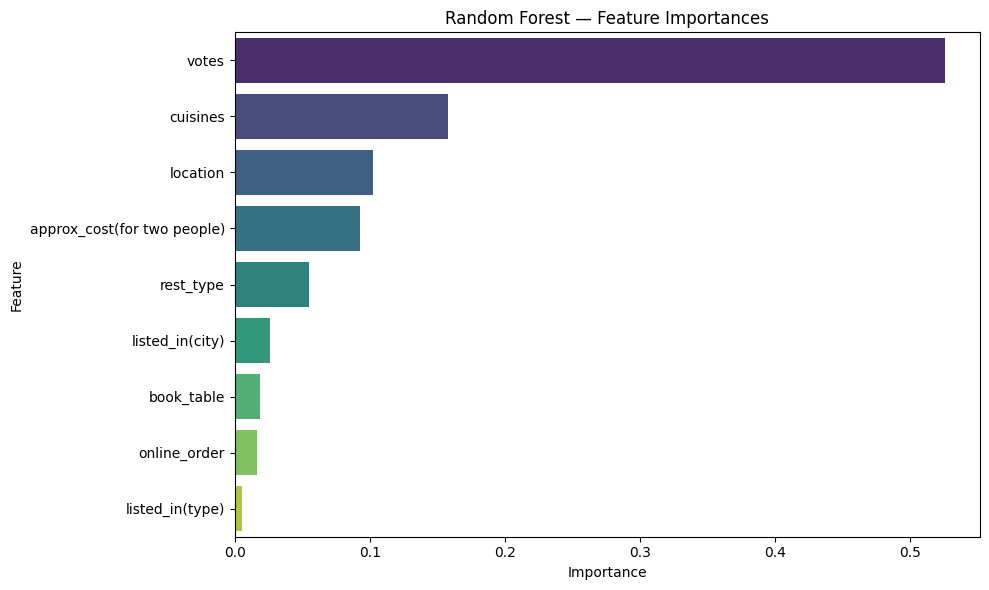


--- Step 4: Retrain Final Model ---

--- Metrics ---
  Train — MSE: 0.0132 | RMSE: 0.1150 | MAE: 0.0531 | R²: 0.9319
  Test — MSE: 0.0302 | RMSE: 0.1737 | MAE: 0.0855 | R²: 0.8441


In [ ]:
print('=' * 60)
print('MODEL 3: RANDOM FOREST REGRESSOR')
print('=' * 60)

# --- Step 1: Train baseline model ---
print('\n--- Step 1: Baseline Model ---')
rf_baseline = RandomForestRegressor(random_state=42, n_estimators=100)
rf_baseline.fit(X_train, y_train)
y_test_baseline_rf = rf_baseline.predict(X_test)
print(f'  Baseline Test R²: {r2_score(y_test, y_test_baseline_rf):.4f}')
print(f'  Baseline Test RMSE: {np.sqrt(mean_squared_error(y_test, y_test_baseline_rf)):.4f}')

# --- Step 2: Hyperparameter Tuning ---
print('\n--- Step 2: Hyperparameter Tuning (GridSearchCV) ---')
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_rf = GridSearchCV(
    RandomForestRegressor(random_state=42),
    param_grid_rf,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=0
)
grid_rf.fit(X_train, y_train)
print(f'  Best Parameters: {grid_rf.best_params_}')
cv_rmse_rf = np.sqrt(-grid_rf.best_score_)
print(f'  Best CV RMSE: {cv_rmse_rf:.4f}')

# --- Step 3: Feature Selection (Embedded — Feature Importances) ---
print('\n--- Step 3: Feature Selection (Embedded — Feature Importances) ---')
best_rf = grid_rf.best_estimator_
importances = best_rf.feature_importances_

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values('Importance', ascending=False)

print('\nFeature Importances:')
print(importance_df.to_string(index=False))

# Select features above mean importance
mean_imp = importances.mean()
selected_features_rf = importance_df[importance_df['Importance'] > mean_imp]['Feature'].tolist()
print(f'\n  Selected {len(selected_features_rf)} features (importance > mean={mean_imp:.4f}):')
print(f'  {selected_features_rf}')

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Random Forest — Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# --- Step 4: Retrain final model ---
print('\n--- Step 4: Retrain Final Model ---')
X_train_rf = X_train[selected_features_rf]
X_test_rf = X_test[selected_features_rf]

rf_final = RandomForestRegressor(
    **grid_rf.best_params_,
    random_state=42
)
rf_final.fit(X_train_rf, y_train)

# Predictions
y_train_pred_rf = rf_final.predict(X_train_rf)
y_test_pred_rf = rf_final.predict(X_test_rf)

# Evaluate
print('\n--- Metrics ---')
metrics_rf = evaluate_regression('Random Forest', y_train, y_train_pred_rf,
                                  y_test, y_test_pred_rf)
metrics_rf['CV_RMSE'] = round(cv_rmse_rf, 4)
metrics_rf['Num_Features'] = len(selected_features_rf)

## Cell 16: Final Comparison Table

In [ ]:
print('=' * 80)
print('FINAL MODEL COMPARISON TABLE')
print('=' * 80)

all_metrics = [metrics_mlp, metrics_lr, metrics_rf]

comparison_data = {
    'Model': [m['Model'] for m in all_metrics],
    'Features Used': [m['Num_Features'] for m in all_metrics],
    'CV RMSE': [m['CV_RMSE'] for m in all_metrics],
    'Train MSE': [m['Train_MSE'] for m in all_metrics],
    'Train RMSE': [m['Train_RMSE'] for m in all_metrics],
    'Train MAE': [m['Train_MAE'] for m in all_metrics],
    'Train R²': [m['Train_R2'] for m in all_metrics],
    'Test MSE': [m['Test_MSE'] for m in all_metrics],
    'Test RMSE': [m['Test_RMSE'] for m in all_metrics],
    'Test MAE': [m['Test_MAE'] for m in all_metrics],
    'Test R²': [m['Test_R2'] for m in all_metrics],
}

comparison_df = pd.DataFrame(comparison_data)
print(comparison_df.to_string(index=False))

# Identify best model based on Test R²
best_idx = comparison_df['Test R²'].idxmax()
best_model_name = comparison_df.loc[best_idx, 'Model']
best_r2 = comparison_df.loc[best_idx, 'Test R²']
best_rmse = comparison_df.loc[best_idx, 'Test RMSE']

print(f'\n{"=" * 80}')
print(f'BEST MODEL: {best_model_name}')
print(f'  Test R²:   {best_r2}')
print(f'  Test RMSE: {best_rmse}')
print(f'{"=" * 80}')

FINAL MODEL COMPARISON TABLE
                    Model  Features Used  CV RMSE  Train MSE  Train RMSE  Train MAE  Train R²  Test MSE  Test RMSE  Test MAE  Test R²
            MLP Regressor              9   0.3096     0.0961      0.3099     0.2280    0.5054    0.0997     0.3158    0.2333   0.4846
Linear Regression (Ridge)              9   0.3689     0.1360      0.3687     0.2851    0.2998    0.1368     0.3699    0.2873   0.2929
            Random Forest              2   0.1467     0.0132      0.1150     0.0531    0.9319    0.0302     0.1737    0.0855   0.8441

BEST MODEL: Random Forest
  Test R²:   0.8441
  Test RMSE: 0.1737


## Cell 17: Visualization — Model Comparison

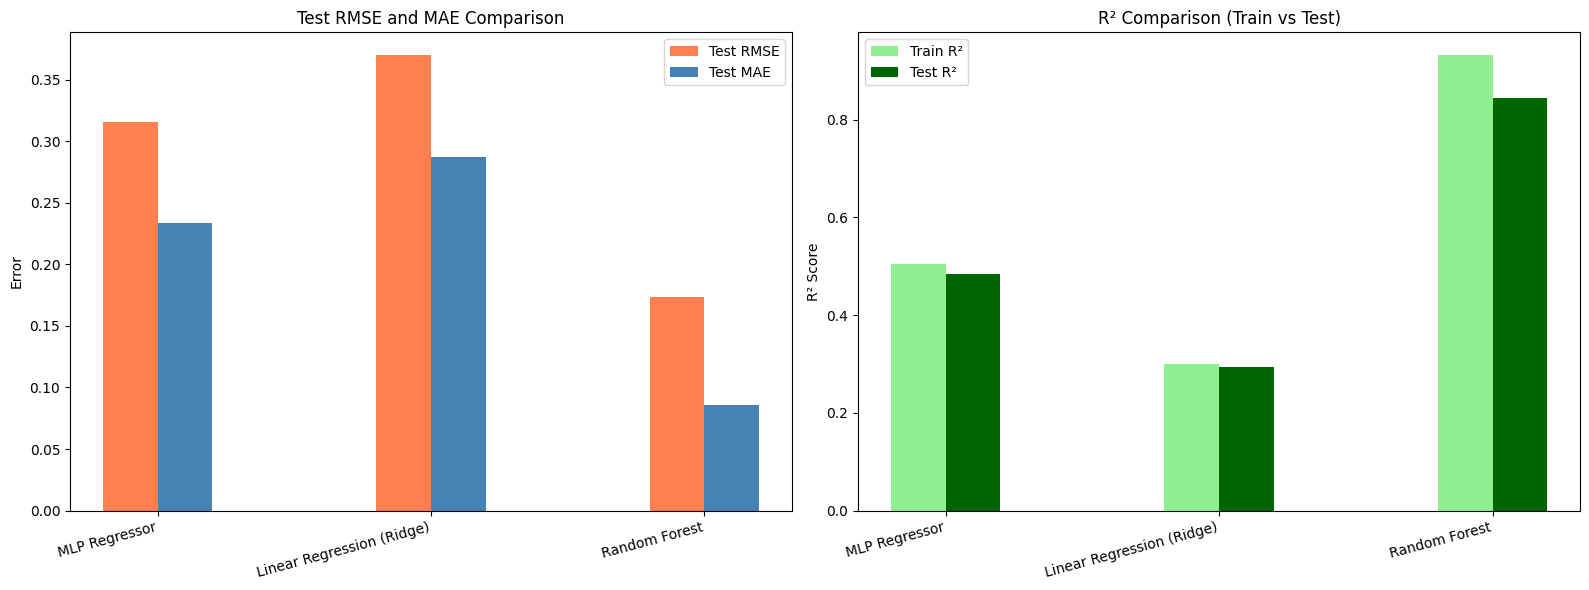


 Regression task completed successfully!


In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

models = comparison_df['Model'].tolist()
x = np.arange(len(models))
width = 0.2

# Test Metrics: RMSE, MAE
axes[0].bar(x - width/2, comparison_df['Test RMSE'], width, label='Test RMSE', color='coral')
axes[0].bar(x + width/2, comparison_df['Test MAE'], width, label='Test MAE', color='steelblue')
axes[0].set_title('Test RMSE and MAE Comparison')
axes[0].set_xticks(x)
axes[0].set_xticklabels(models, rotation=15, ha='right')
axes[0].legend()
axes[0].set_ylabel('Error')

# R² Comparison (Train vs Test)
axes[1].bar(x - width/2, comparison_df['Train R²'], width, label='Train R²', color='lightgreen')
axes[1].bar(x + width/2, comparison_df['Test R²'], width, label='Test R²', color='darkgreen')
axes[1].set_title('R² Comparison (Train vs Test)')
axes[1].set_xticks(x)
axes[1].set_xticklabels(models, rotation=15, ha='right')
axes[1].legend()
axes[1].set_ylabel('R² Score')

plt.tight_layout()
plt.show()

print('\n Regression task completed successfully!')